In [4]:
from skimage import io, color, filters, feature, restoration
from skimage.transform import resize, rotate
import matplotlib.pyplot as plt
from PIL import Image
import glob
from scipy.misc import imread
import numpy as np

In [5]:
import sys
sys.path.append("..")

In [6]:
from src.image_shear import shear_single


In [7]:
from src.CNN import imageCNN
from src.standardizer import standardizer

In [8]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [9]:
ruled = glob.glob('../Sketches/Ruled/*')

In [36]:
img = '../Sketches/Ruled/Sketch_Page_033.jpg'

In [37]:
images = standardizer(ruled, img)

In [40]:
images.greyscale_one()
images.standardize_one()
images.binarize_one(.7)

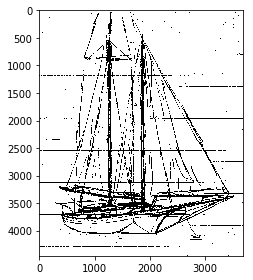

In [58]:
io.imshow(images.binarized_image)

In [63]:
figure = images.binarized_image

In [64]:
def zoom(row, col, image):
        return image[row:row+500, col:col+500]

In [65]:
zoom = zoom(3000, 300, figure)

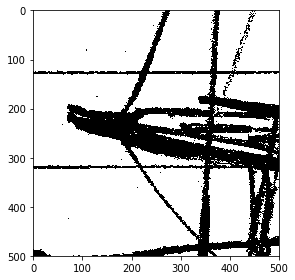

In [66]:
io.imshow(zoom)

In [44]:
size = 30
row_index = 0
col_index = 58


window = zoom[row_index:row_index+size, col_index:col_index+size]
pixel_value = window[15, 15]
# Overlay the two images
fig, ax = plt.subplots(1, 1)
ax.imshow(window, cmap='gray')
ax.set_title('Pixel Value: {}'.format(pixel_value))



NameError: name 'zoom' is not defined

In [34]:
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
filepath = '../data/to_predict/example.png'
fig.savefig(filepath, bbox_inches=extent)
shear_single(filepath)

In [35]:
imread(filepath).shape

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


(204, 204, 4)

In [36]:
raw_image = imread(filepath)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


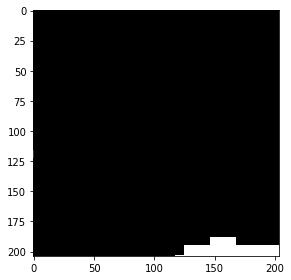

In [37]:
io.imshow(raw_image)

In [38]:
image_resized = resize(raw_image, (30, 30))

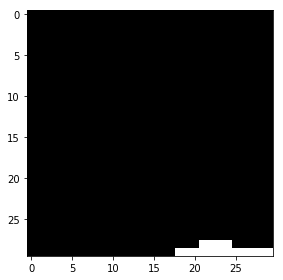

In [39]:
io.imshow(np.round(image_resized[:, :, :3]))

In [40]:
image_resized.shape

(30, 30, 4)

In [41]:
image_resized[:, :, :3].shape

(30, 30, 3)

In [42]:
np.round(image_resized[:, :, :3])

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [43]:
model = load_model('../models/model_names/test5.h5')

In [44]:
img = image.load_img('../data/to_predict/example.png', target_size=(30, 30))

In [45]:
x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)


In [46]:
x = x.reshape(-1, 30, 30, 3)

In [47]:
class_prediction = model.predict(x)

In [48]:
class_prediction[0][0]

0.0